<a href="https://colab.research.google.com/github/lucabarattini/COMS-W4721/blob/main/COMS_W4721_HW2_Luca_Barattini_LB3656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## § Luca Barattini - UNI: LB3656 - COMS-W4721 HW2:

In this assignment, we will use the [*spambase* dataset](https://archive.ics.uci.edu/dataset/94/spambase) and build classifiers using
* logistic regression,
* Naive Bayes, and
* k-Nearest Neighbors (kNN).


Some aspects of this homework are intentionally left underspecified. In practice, machine learning problems rarely come with a single “correct” pipeline. You are expected to make reasonable choices, clearly document your design choices in text (and explain your reasoning, if applicable). Different students may make different choices; that is expected and encouraged!

⏰ This homework is due **Sunday Feb 22, 11:59pm ET**. Please submit:
* a PDF of the notebook to `homework2`;
* your `.ipynb` file to `homework2-coding`.

# Load the Dataset

The dataset `spambase.csv` is originally downloaded from [Kaggle](https://www.kaggle.com/datasets/colormap/spambase). Use the column `spam` as the label and all other variables as input features (**binary label**: `1 = spam`, `0 = not spam`).

In [32]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)


In [ ]:
# YOUR CODE HERE
df = pd.read_csv('spambase.csv')
display(df)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0



How many features are there?

*Answer:* 57. The Spam column is acting as a label for our model.

# Part A — Data Splitting and Preprocessing
1. Split the dataset into **training**, **validation**, and **test** sets.
2. Optionally standardize the features; justify your choice.


> ⚠️ If you decide to standardize the features, ensure that any information computed from the data (e.g., scaling factors) is computed only on the training data, and then applied unchanged to the validation and test sets!




In [ ]:
# YOUR CODE HERE

# Preliminary check on NaNs and potential class imbalance instance
print(df.isna().sum())
display(df.describe())


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
# Most important check, class imbalance:
print(df['spam'].value_counts(normalize=True))

spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and label (y)
X = df.drop(columns=['spam'])
y = df['spam']

# First split: Extract 70% for Training, leave 30% as temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Divide the 30% temporary pool in half (15% Val, 15% Test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3220
Validation set size: 690
Testing set size: 691


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the learned scaling factors to Val and Test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)




Did you scale the features? Why or why not?

*Answer:* Yes, the features were scaled (standardized).

This is necessary because the dataset contains features with very different numerical range. While most of the word and character frequencies are small decimals, the `capital_run_length` features represent absolute counts that reach into the thousands (e.g., up to `15,841`).

Because we are building models like `k-Nearest Neighbors (kNN)`, which relies on distance calculations, and regularized Logistic Regression, leaving the data unscaled would cause the features with large magnitudes to completely dominate the model and overpower the frequency data.

# Part B1 - Logistic Regression

1. Train a logistic regression classifier and store the trained model as `trained_logistic_regression`.
2. For a range of thresholds, compute **validation MSE** between `y_val` and the `thresholded 0/1 predictions`, and plot MSE vs threshold.  
3. Report the threshold that gives the best validation MSE, and store it as `best_threshold`.

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

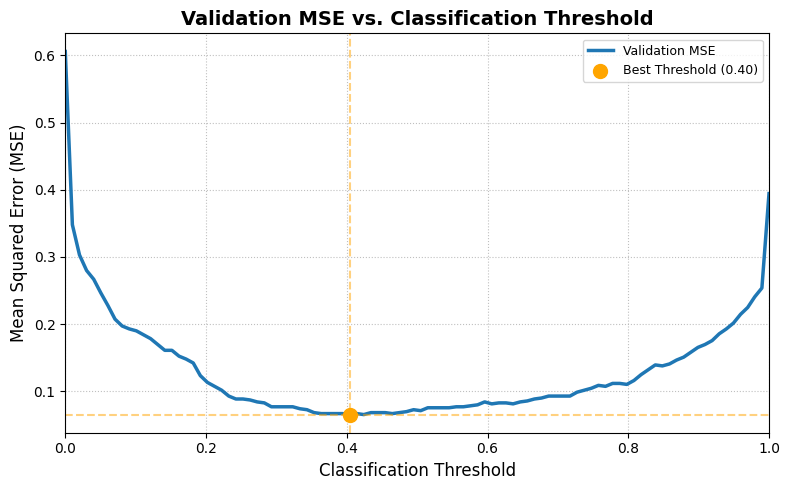

In [39]:
# 1. Train the logistic regression classifier
trained_logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
trained_logistic_regression.fit(X_train_scaled, y_train)

# Get predicted probabilities for the validation set
y_val_probs = trained_logistic_regression.predict_proba(X_val_scaled)[:, 1]

# 2. Compute validation MSE for a range of thresholds
thresholds = np.linspace(0, 1, 100)
mse_values = []

for t in thresholds:
    # Threshold predictions: 1 if prob >= threshold, else 0
    y_pred_thresholded = (y_val_probs >= t).astype(int)
    # Calculate MSE
    mse = mean_squared_error(y_val, y_pred_thresholded)
    mse_values.append(mse)

# 3. Report and store the best threshold
best_idx = np.argmin(mse_values)
best_threshold = thresholds[best_idx]
best_mse = mse_values[best_idx]

# Plot MSE vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, mse_values, color='#1f77b4', linewidth=2.5, label='Validation MSE')

# Highlight the minimum MSE with a red dot and dashed reference lines
plt.scatter(best_threshold, best_mse, color='orange', s=100, zorder=5, label=f'Best Threshold ({best_threshold:.2f})')
plt.axvline(x=best_threshold, color='orange', linestyle='--', alpha=0.5)
plt.axhline(y=best_mse, color='orange', linestyle='--', alpha=0.5)

plt.title('Validation MSE vs. Classification Threshold', fontsize=14, fontweight='bold')
plt.xlabel('Classification Threshold', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlim([0, 1])
plt.grid(True, linestyle=':', alpha=0.8)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Validation MSE at Best Threshold: {best_mse:.4f}")

Best Threshold: 0.4040
Validation MSE at Best Threshold: 0.0652


# Part B2 - Naive Bayes
1. Train a **Gaussian Naive Bayes** classifier.  
2. Compute MSE on the validation set.
3. Store the model as `trained_naive_bayes`.



Before training your model, briefly explain why *Gaussian Naive Bayes* is a better model class than *Bernoulli Naive Bayes* for this dataset.

*Answer:*

 Bernoulli Naive Bayes is strictly formulated for binary or boolean features (e.g., $x \in \{0, 1\}$, representing word presence vs. absence).


Our dataset, however, consists of continuous, real-valued features such as word frequencies and capital letters length.

Gaussian Naive Bayes is the correct model class in this case because it is explicitly designed to handle continuous numerical data by assuming each feature is drawn from a normal distribution.

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
# YOUR CODE HERE

# 1. Train a Gaussian Naive Bayes classifier
trained_naive_bayes = GaussianNB()
trained_naive_bayes.fit(X_train_scaled, y_train)

# 2. Compute MSE on the validation set
y_val_pred_nb = trained_naive_bayes.predict(X_val_scaled)
mse_nb = mean_squared_error(y_val, y_val_pred_nb)

print(f"Gaussian Naive Bayes Validation MSE: {mse_nb:.4f}")

Gaussian Naive Bayes Validation MSE: 0.1826


# Part B3 - k-Nearest Neighbors

1. Train kNN classifiers for different values for $k$, and plot **validation MSE vs $k$**.
2. Report the value for $k$ that gives the best validation MSE.
3. Store your kNN model that achieved the best validation MSE as `trained_knn`.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier(n_neighbors=6)


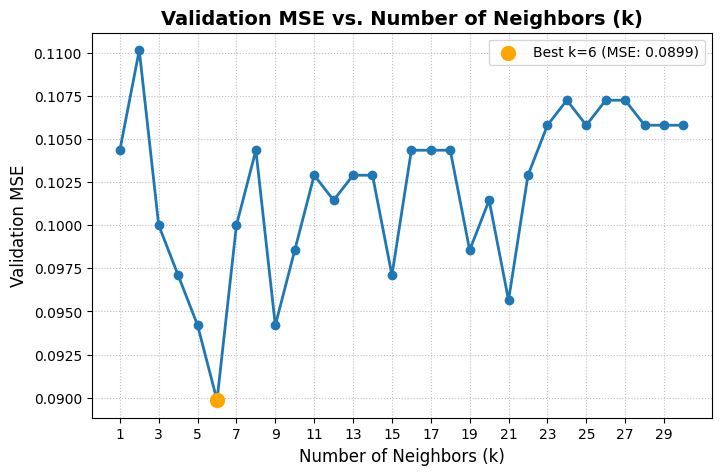

In [48]:
# YOUR CODE HERE

# 1. Train kNN classifiers for different values of k
k_values = range(1, 31)
mse_knn_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_val_pred)
    mse_knn_values.append(mse)

# 2. Report the best k
best_k_idx = np.argmin(mse_knn_values)
best_k = k_values[best_k_idx]
best_knn_mse = mse_knn_values[best_k_idx]

# 3. Store the kNN model that achieved the best validation MSE
trained_knn = KNeighborsClassifier(n_neighbors=best_k)
trained_knn.fit(X_train_scaled, y_train)

# Plot validation MSE vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_knn_values, color='#1f77b4', marker='o', linestyle='-', linewidth=2)
plt.title('Validation MSE vs. Number of Neighbors (k)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Validation MSE', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.8)
plt.xticks(k_values[::2])

# Highlight best k on plot
plt.scatter(best_k, best_knn_mse, color='orange', s=100, zorder=5, label=f'Best k={best_k} (MSE: {best_knn_mse:.4f})')
plt.legend()
plt.show()

In [43]:
print(f"The best validation MSE is {best_knn_mse:.4f} at k = {best_k}")

The best validation MSE is 0.0899 at k = 6


# Part C - Model Deployment

Which model would you deploy in practice? Briefly explain your reasoning both in terms of validation MSE and practical considerations.

In [50]:
# YOUR CODE HERE

# Combine the training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Refit the scaler on the newly combined train+val set
final_scaler = StandardScaler()
X_train_val_scaled = final_scaler.fit_transform(X_train_val)

# Transform the test set using the new scaler
X_test_scaled_final = final_scaler.transform(X_test)

# 1. Refit the chosen model on train+val
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_val_scaled, y_train_val)

y_train_val_probs = final_model.predict_proba(X_train_val_scaled)[:, 1]
y_train_val_pred = (y_train_val_probs >= best_threshold).astype(int)
train_val_mse = mean_squared_error(y_train_val, y_train_val_pred)

# 2. Evaluate once on the test set
y_test_probs = final_model.predict_proba(X_test_scaled_final)[:, 1]
y_test_pred = (y_test_probs >= best_threshold).astype(int)
test_mse = mean_squared_error(y_test, y_test_pred)

*Answer:*

---

I would deploy the Logistic Regression model.

First and foremost, it empirically outperformed the others, achieving the lowest Validation MSE (`0.0652`) compared to k-Nearest Neighbors (`0.0899`) and Gaussian Naive Bayes (`0.1826`).

Furthermore, selecting this model perfectly aligns with the Occam's Razor principle, which tells us that the simplest solution is often the best.

Logistic Regression ultimately can be reconducted to a simple, mathematically elegant parametric equation (a fast dot product).

In contrast, kNN introduces unnecessary computational complexity; as a "lazy learner," it must store the entire training dataset in memory and calculate distances for every single new incoming email.

---

Recall that before deploying the model, it is best practice to:
1. Refit the chosen model on **train+val**.
2. Evaluate once on **test**.

Report the training and test MSE of the model you chose. Interpret the results.

In [51]:
# YOUR CODE HERE
print(f"Training MSE (Train+Val sets): {train_val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Training MSE (Train+Val sets): 0.0668
Test MSE: 0.0781


*Answer:*

The model demonstrates excellent generalization to unseen data. The Training MSE on the combined set is `0.0668` (an error rate of `6.68%`), while the Test MSE is only slightly higher at `0.0781` (a `7.81%` error rate).

Because the Test MSE is remarkably close to the Training MSE, **we can confidently conclude that the Logistic Regression model is not overfitting and is ready for real world deployment**.

# End of HW 2.1! 🎉🎉🎉